Import Libraries

In [ ]:
import pandas as pd
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


Read CSV

In [ ]:
df = pd.read_csv('/content/Twitter_Data.csv')


In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


Drop Missing Values if any


In [ ]:
df = df.dropna()

plot

Text(0.5, 1.0, 'Number of categories')

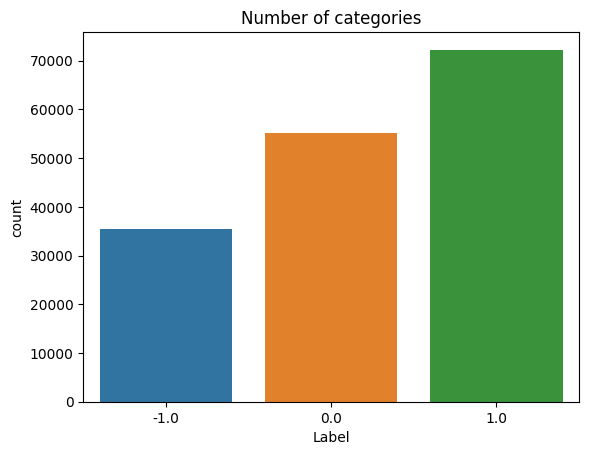

In [ ]:
sns.countplot(x='category', data=df)
plt.xlabel('Label')
plt.title('Number of categories')

test Train split


In [ ]:
X = df['clean_text']
Y = df['category']
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [ ]:
from keras.layers import SpatialDropout1D
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])


In [ ]:
history= model.fit(sequences_matrix, Y_train, batch_size=64, epochs=20, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])


Epoch 1/20
1732/1732 [==============================] - 1547s 893ms/step - loss: 0.4697 - accuracy: 0.8407 - val_loss: 0.4672 - val_accuracy: 0.8411
Epoch 2/20
1732/1732 [==============================] - 1541s 890ms/step - loss: 0.4662 - accuracy: 0.8413 - val_loss: 0.4663 - val_accuracy: 0.8416
Epoch 3/20
1732/1732 [==============================] - 1544s 892ms/step - loss: 0.4641 - accuracy: 0.8415 - val_loss: 0.4691 - val_accuracy: 0.8415


In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on test data
accr = model.evaluate(test_sequences_matrix, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))


764/764 [==============================] - 87s 114ms/step - loss: 0.4691 - accuracy: 0.8405
Test set
  Loss: 0.469
  Accuracy: 0.841


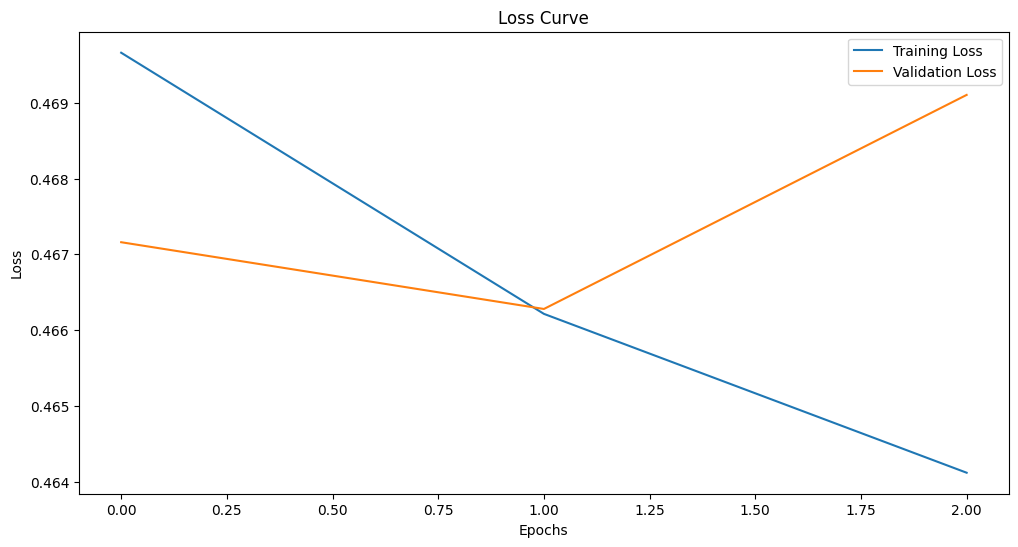

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()